# **Question 1**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

length= 10 
pos_count 0 
neg_count 0


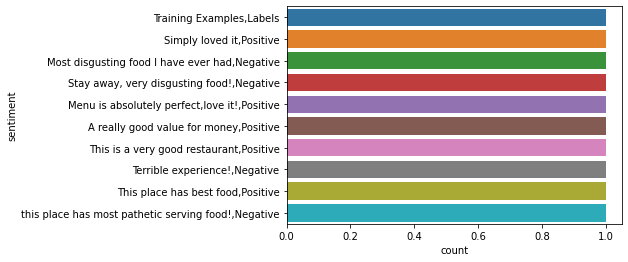

In [ ]:
df = pd.read_csv('/dataset/data1.txt', sep='\t',names=['sentiment', 'document'])
df
length = len(df)
pos_count = len(df[df['sentiment'] == 1]) # positive_sentiment count
neg_count = len(df[df['sentiment'] == 0]) # negative_sentiment count
print ('length=', length,'\npos_count',pos_count,'\nneg_count',neg_count,)   
sns.countplot(y="sentiment",data=df)#plotting the data
plt.show()

In [ ]:
def sentence_to_words(sentence):
  l = sentence.lower() #convert sentence to lowercase
  l = l.split() #split sentence into individual word
  p = ''
  word_list = []

  for word in l:
    p = ''
    for letter in word:
      if ord(letter) >= 67 and ord(letter) <= 122:
        p = p + letter
        word_list.append(p)
  return word_list #return the word list of the sentence devoid of special characters and numericals

def naive_bayes_train(X, Y, a=0.000001):
  n_length = len(X)
  n_class_pos = len(Y[Y == 1])
  n_class_neg = len(Y[Y == 0])
  prior_pos = n_class_pos / n_length #prior probability for  class
  prior_neg = n_class_neg / n_length #prior probability for class 
  (n, p, bag) = bag_of_words_maker(X, Y)

  pr = {}

  for i in range(len(bag)): #evaluating the likelihood prob for each word given a class
    p_pos = (bag['count_pos'][i] + a) / (p + len(bag) * a)

    p_neg = (bag['count_neg'][i] + a) / (n + len(bag) * a)

    pr[bag['index'][i]] = [p_pos, p_neg]
    pr = pd.DataFrame(pr).T
    pr.columns = ['sent=positive', 'sent=negative']
    pr = pr.reset_index()

    return (prior_pos, prior_neg, pr)

def naive_bayes_predict( X,pr,prior_pos,prior_neg,):
  Y = []
  for i in range(len(X)):
    k_pos = 1
    k_neg = 1
    p = sentence_to_words(X[i])
    for k in range(len(pr)):
      for word in p:
        if word == pr['index'][k]:
          k_pos = k_pos * pr['sent=positive'][k] #pdt of likelihood prob given the word is present in vocabulary 
          k_neg = k_neg * pr['sent=negative'][k]
    nb = [prior_neg * k_neg, prior_pos * k_pos] # multiply each likelihood prob with the prior prob
    Y.append(np.argmax(nb))
  return Y

def bag_of_words_maker(X, Y):
  bag_dict_binary_NB_pos = {} #keeping track of the positive class words
  bag_dict_binary_NB_neg = {} #keeping track of the negative class words
  stop_words = ['the','is','a','was','it','food','This','and', '','i''I','am','of','that',]
  for i in range(len(X)):
     p = sentence_to_words(X[i])
     sent = Y[i]
     x_pos = {}
     x_neg = {} #we intialize the dict every iteration so that it does not consider repititions .(Binary NB)
     if sent == 1:
       for word in p:
         if word in x_pos.keys():
            x_pos[word] = [x_pos[word][0] + 1, x_pos[word][1]] #word is the key and value stored is [count, sentiment]
         else:
           x_pos[word] = [1, sent]
           
       for key in x_pos.keys():
         if key in bag_dict_binary_NB_pos.keys():
           bag_dict_binary_NB_pos[key] = \
           [bag_dict_binary_NB_pos[key][0] + 1,
                bag_dict_binary_NB_pos[key][1]]
         else:
           bag_dict_binary_NB_pos[key] = [1, sent] #storing it in the final dict 
                  
     if sent == 0:
       for word in p:
         if word in x_neg.keys():
           x_neg[word] = [x_neg[word][0] + 1, x_neg[word][1]]
         else:
           x_neg[word] = [1, sent]
       for key in x_neg.keys():
         if key in bag_dict_binary_NB_neg.keys():
           bag_dict_binary_NB_neg[key] = \
           [bag_dict_binary_NB_neg[key][0] + 1,
           bag_dict_binary_NB_neg[key][1]]
         else:
           bag_dict_binary_NB_neg[key] = [1, sent]

x = df['document']
y = df['sentiment']
(n, p, bag_of_words) = bag_of_words_maker(x, y)
print (n, ' ', p)
bag_of_words.head(5)
prior_pos,prior_neg,table = naive_bayes_train(x,y)
table.head(5)
from sklearn.model_selection import train_test_split

X = df["document"]
Y = df["sentiment"]
x_train, x_test, y_train, y_test = train_test_split(X,Y,)

x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
a,b,bag = naive_bayes_train(x_train,y_train)
y_predicted = naive_bayes_predict(x_test,bag,a,b)
y_predicted
from sklearn.metrics import accuracy_score, confusion_matrix
print ('Accuracy=', accuracy_score(y_test, np.array(y_predicted)))

(tn, fp, fn, tp) = confusion_matrix(y_test,np.array(y_predicted)).ravel()

print ('precsion=', tp / (tp + fp))
print ('recall=', tp / (tp + fn))

In [ ]:
#printing the training data
train_tb = PrettyTable(["training data", "Labels"])
for i in range (0, len(training_data)):
  train_tb. add_row([training_data[i], training_data_labels[i])
print(train_tb)

In [ ]:
final_tb = PrettyTable(["Testing Data", "Label"])
for i in range(0,len(testing_data)):
  final_tb. add_row([testing_data[i], testing_data_labels[i]])
print(final_tb)


# **Question 2**

In [ ]:
import numpy as np
import pandas as pd
from csv import reader
data = pd. read_csv(r'/dataset/data2.csv')
data . info()
data. columns
data. head (10)
query_data= [[4,0,2,0,1, 0, 6,0], [0, 0,2,0, 0, 9, 0,9], [5,0,2,5, 0,9,0,9]]
outputlabels = data[ 'Category' ]. unique()
words = list(data. columns) [: -1]
numtraindocuments = data. shape[0]
print (outputlabels)
print (words)
print (numtraindocuments)
conditional_probability = {}
probability = {}
for outputClass in outputlabels:
   temp_dataframe=data.loc[data['Category']==outputClass ]
   probability [outputClass ]=(temp_dataframe. shape[0]/numtraindocuments)

print (probability)
ALPHA=1
for outputClass in outputlabels :
   temp_dataframe = data. loc[data[ 'Category' ]==outputClass]
   total_word_count_in_category =0
   for i in range(temp_dataframe. shape[0]) :
     for word in words:
         total_word_count_in_category+= temp_dataframe. iloc[i][word]
   for word in words :
      current_word_count_in_category =0
      for i in range(temp_dataframe. shape[0]) :
         current_word_count_in_category += temp_dataframe. iloc[i] [word]
         cur_prob = (current_word_count_in_category + ALPHA) / (total_word_count_in_category)
         conditional_probability [(word, outputClass) ] = cur_prob

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   TDF       7 non-null      int64 
 1   Nifty     7 non-null      int64 
 2   Sidhu     7 non-null      int64 
 3   BJP       7 non-null      int64 
 4   Sensex    7 non-null      int64 
 5   Sixer     7 non-null      int64 
 6   Congress  7 non-null      int64 
 7   Century   7 non-null      int64 
 8   Category  7 non-null      object
dtypes: int64(8), object(1)
memory usage: 632.0+ bytes
['Politics' 'Business' 'Sports']
['TDF', 'Nifty', 'Sidhu', 'BJP', 'Sensex', 'Sixer', 'Congress', 'Century']
7
{'Politics': 0.42857142857142855, 'Business': 0.2857142857142857, 'Sports': 0.2857142857142857}


In [ ]:
print("Conditional probability after applying smoothing\n")
conditional_probability

Conditional probability after applying smoothing



{('BJP', 'Business'): 0.18518518518518517,
 ('BJP', 'Politics'): 0.2222222222222222,
 ('BJP', 'Sports'): 0.08,
 ('Century', 'Business'): 0.07407407407407407,
 ('Century', 'Politics'): 0.022222222222222223,
 ('Century', 'Sports'): 0.36,
 ('Congress', 'Business'): 0.07407407407407407,
 ('Congress', 'Politics'): 0.4,
 ('Congress', 'Sports'): 0.08,
 ('Nifty', 'Business'): 0.37037037037037035,
 ('Nifty', 'Politics'): 0.044444444444444446,
 ('Nifty', 'Sports'): 0.04,
 ('Sensex', 'Business'): 0.48148148148148145,
 ('Sensex', 'Politics'): 0.06666666666666667,
 ('Sensex', 'Sports'): 0.04,
 ('Sidhu', 'Business'): 0.037037037037037035,
 ('Sidhu', 'Politics'): 0.08888888888888889,
 ('Sidhu', 'Sports'): 0.28,
 ('Sixer', 'Business'): 0.037037037037037035,
 ('Sixer', 'Politics'): 0.022222222222222223,
 ('Sixer', 'Sports'): 0.4,
 ('TDF', 'Business'): 0.037037037037037035,
 ('TDF', 'Politics'): 0.3111111111111111,
 ('TDF', 'Sports'): 0.04}